##Top Economies Analysis: GDP, GNI, and Economic Structure
####Does economic size translate into individual prosperity?


In [150]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
import numpy as np
import seaborn as sns

df = pd.read_csv('/content/Global Economy Indicators.csv')
df.drop_duplicates(inplace=True)
df

,CountryID,Country,Year,AMA exchange rate,IMF based exchange rate,Population,Currency,Per capita GNI,"Agriculture, hunting, forestry, fishing (ISIC A-B)",Changes in inventories,...,Household consumption expenditure (including Non-profit institutions serving households),Imports of goods and services,Manufacturing (ISIC D),"Mining, Manufacturing, Utilities (ISIC C-E)",Other Activities (ISIC J-P),Total Value Added,"Transport, storage and communication (ISIC I)","Wholesale, retail trade, restaurants and hotels (ISIC G-H)",Gross National Income(GNI) in USD,Gross Domestic Product (GDP)
0,4,Afghanistan,1970,0.044998,0.044998,10752971,Afghani,164,8.699174e+08,NaN,...,1.551094e+09,1.952772e+08,3.701468e+08,3.766908e+08,1.277478e+08,1.731454e+09,8.391720e+07,2.263871e+08,1.766528e+09,1.731436e+09
1,4,Afghanistan,1971,0.044998,0.044998,11015857,Afghani,168,9.108281e+08,NaN,...,1.675426e+09,2.762965e+08,3.875495e+08,3.944012e+08,1.337541e+08,1.812857e+09,8.786038e+07,2.370192e+08,1.850122e+09,1.812838e+09
2,4,Afghanistan,1972,0.044998,0.044998,11286753,Afghani,149,8.279453e+08,NaN,...,1.498812e+09,2.903704e+08,3.522847e+08,3.585129e+08,1.215827e+08,1.647918e+09,7.986452e+07,2.154773e+08,1.683948e+09,1.647900e+09
3,4,Afghanistan,1973,0.044998,0.044998,11575305,Afghani,150,8.554869e+08,NaN,...,1.508024e+09,2.629629e+08,3.640103e+08,3.704458e+08,1.256302e+08,1.702735e+09,8.252888e+07,2.226243e+08,1.739998e+09,1.702716e+09
4,4,Afghanistan,1974,0.044998,0.044998,11869879,Afghani,177,1.035913e+09,NaN,...,1.778819e+09,3.056792e+08,4.407604e+08,4.485528e+08,1.521192e+08,2.061752e+09,9.991860e+07,2.695259e+08,2.106420e+09,2.061729e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10507,894,Zambia,2017,9.519501,9.519501,17298054,Kwacha,1448,1.041005e+09,567729313.0,...,1.215309e+10,9.465895e+09,2.102369e+09,7.194153e+09,6.187124e+09,2.416662e+10,1.965026e+09,5.323590e+09,2.505604e+10,2.586816e+10
10508,894,Zambia,2018,10.458143,10.458143,17835893,Kwacha,1451,8.791160e+08,929063411.0,...,1.183200e+10,9.717269e+09,1.801783e+09,6.556884e+09,5.791375e+09,2.422570e+10,2.490720e+09,5.990720e+09,2.588455e+10,2.631198e+10
10509,894,Zambia,2019,12.889418,12.889418,18380477,Kwacha,1246,6.668385e+08,817104395.0,...,9.848112e+09,7.961415e+09,1.582484e+09,5.584425e+09,5.231062e+09,2.153971e+10,2.537646e+09,4.959277e+09,2.291011e+10,2.331036e+10
10510,894,Zambia,2020,18.344093,18.344093,18927715,Kwacha,928,5.391694e+08,439295787.0,...,6.969267e+09,5.892353e+09,1.397303e+09,4.269405e+09,4.217431e+09,1.718020e+10,2.258715e+09,3.234123e+09,1.756233e+10,1.811064e+10


In [151]:
df.shape
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10512 entries, 0 to 10511
Data columns (total 26 columns):
 #   Column                                                                                      Non-Null Count  Dtype  
---  ------                                                                                      --------------  -----  
 0    CountryID                                                                                  10512 non-null  int64  
 1    Country                                                                                    10512 non-null  object 
 2    Year                                                                                       10512 non-null  int64  
 3    AMA exchange rate                                                                          10512 non-null  float64
 4    IMF based exchange rate                                                                    10512 non-null  float64
 5    Population                            

In [152]:
df.columns




Index([' CountryID ', ' Country ', ' Year ', ' AMA exchange rate ',
       ' IMF based exchange rate ', ' Population ', ' Currency ',
       ' Per capita GNI ',
       ' Agriculture, hunting, forestry, fishing (ISIC A-B) ',
       ' Changes in inventories ', ' Construction (ISIC F) ',
       ' Exports of goods and services ', ' Final consumption expenditure ',
       ' General government final consumption expenditure ',
       ' Gross capital formation ',
       ' Gross fixed capital formation (including Acquisitions less disposals of valuables) ',
       ' Household consumption expenditure (including Non-profit institutions serving households) ',
       ' Imports of goods and services ', ' Manufacturing (ISIC D) ',
       ' Mining, Manufacturing, Utilities (ISIC C-E) ',
       ' Other Activities (ISIC J-P) ', ' Total Value Added ',
       ' Transport, storage and communication (ISIC I) ',
       ' Wholesale, retail trade, restaurants and hotels (ISIC G-H) ',
       ' Gross National In

In [153]:
df.columns = df.columns.str.strip()
df.columns

Index(['CountryID', 'Country', 'Year', 'AMA exchange rate',
       'IMF based exchange rate', 'Population', 'Currency', 'Per capita GNI',
       'Agriculture, hunting, forestry, fishing (ISIC A-B)',
       'Changes in inventories', 'Construction (ISIC F)',
       'Exports of goods and services', 'Final consumption expenditure',
       'General government final consumption expenditure',
       'Gross capital formation',
       'Gross fixed capital formation (including Acquisitions less disposals of valuables)',
       'Household consumption expenditure (including Non-profit institutions serving households)',
       'Imports of goods and services', 'Manufacturing (ISIC D)',
       'Mining, Manufacturing, Utilities (ISIC C-E)',
       'Other Activities (ISIC J-P)', 'Total Value Added',
       'Transport, storage and communication (ISIC I)',
       'Wholesale, retail trade, restaurants and hotels (ISIC G-H)',
       'Gross National Income(GNI) in USD', 'Gross Domestic Product (GDP)'],
    

In [154]:
last_year = df['Year'].max()
df_last_year = df[df['Year'] == last_year].copy()
top_countries = df_last_year.sort_values('Gross Domestic Product (GDP)', ascending=False).head(10)
top_countries

,CountryID,Country,Year,AMA exchange rate,IMF based exchange rate,Population,Currency,Per capita GNI,"Agriculture, hunting, forestry, fishing (ISIC A-B)",Changes in inventories,...,Household consumption expenditure (including Non-profit institutions serving households),Imports of goods and services,Manufacturing (ISIC D),"Mining, Manufacturing, Utilities (ISIC C-E)",Other Activities (ISIC J-P),Total Value Added,"Transport, storage and communication (ISIC I)","Wholesale, retail trade, restaurants and hotels (ISIC G-H)",Gross National Income(GNI) in USD,Gross Domestic Product (GDP)
10144,840,United States,2021,1.000000,1.000000,336997624,US Dollar,70081,2.070000e+11,-1.909100e+10,...,1.590000e+13,3.400000e+12,2.500000e+12,3.270000e+12,1.290000e+13,2.330000e+13,2.490000e+12,3.520000e+12,2.360000e+13,2.330000e+13
1999,156,China,2021,6.448975,6.448975,1425893465,Yuan Renminbi,12324,1.350000e+12,1.710000e+11,...,6.800000e+12,3.060000e+12,4.870000e+12,5.780000e+12,5.970000e+12,1.770000e+13,1.410000e+12,1.990000e+12,1.760000e+13,1.770000e+13
4680,392,Japan,2021,109.754324,109.754324,124612530,Yen,41162,5.141133e+10,-4.100977e+09,...,2.660000e+12,9.360000e+11,9.950000e+11,1.150000e+12,2.210000e+12,4.910000e+12,4.910000e+11,7.330000e+11,5.130000e+12,4.940000e+12
3484,276,Germany,2021,0.845494,0.845494,83408554,Euro,52885,3.624035e+10,5.914056e+10,...,2.100000e+12,1.780000e+12,8.030000e+11,9.260000e+11,1.870000e+12,3.850000e+12,3.670000e+11,4.380000e+11,4.410000e+12,4.260000e+12
4212,356,India,2021,73.918013,73.918013,1407563842,Indian Rupee,2239,5.380000e+11,2.951508e+10,...,1.910000e+12,7.650000e+11,4.470000e+11,5.960000e+11,1.040000e+12,2.890000e+12,1.710000e+11,3.060000e+11,3.150000e+12,3.200000e+12
10008,826,United Kingdom,2021,0.727065,0.727065,67281039,Pound Sterling,46338,2.113154e+10,1.140063e+10,...,1.890000e+12,8.990000e+11,2.750000e+11,3.810000e+11,1.600000e+12,2.810000e+12,2.760000e+11,3.580000e+11,3.120000e+12,3.130000e+12
3140,250,France,2021,0.845494,0.845494,66875883,Euro,45535,4.851482e+10,2.332009e+10,...,1.560000e+12,9.290000e+11,2.630000e+11,3.440000e+11,1.470000e+12,2.620000e+12,2.830000e+11,3.280000e+11,3.050000e+12,2.960000e+12
4524,380,Italy,2021,0.845494,0.845494,59240329,Euro,36216,4.066734e+10,-3.742190e+08,...,1.220000e+12,6.390000e+11,3.140000e+11,3.800000e+11,9.250000e+11,1.890000e+12,1.670000e+11,2.830000e+11,2.150000e+12,2.110000e+12
1635,124,Canada,2021,1.253877,1.253877,38155012,Canadian Dollar,51741,3.529815e+10,-2.449204e+09,...,1.080000e+12,6.090000e+11,1.960000e+11,3.360000e+11,9.630000e+11,1.850000e+12,1.440000e+11,2.350000e+11,1.970000e+12,1.990000e+12
4920,410,Republic of Korea,2021,1143.951667,1143.951667,51830139,Won,35329,3.240994e+10,9.406341e+09,...,8.360000e+11,6.960000e+11,4.610000e+11,4.940000e+11,7.300000e+11,1.650000e+12,1.430000e+11,1.580000e+11,1.830000e+12,1.810000e+12


In [155]:
df_last_year['Total_Value_Added_per_capita'] = df_last_year['Total Value Added'] / df_last_year['Population']
df_last_year['Investment_ratio'] = df_last_year['Gross capital formation'] / df_last_year['Total Value Added'] * 100


In [156]:
top_countries = df_last_year.sort_values('Gross Domestic Product (GDP)', ascending=False).head(10)
top_countries

,CountryID,Country,Year,AMA exchange rate,IMF based exchange rate,Population,Currency,Per capita GNI,"Agriculture, hunting, forestry, fishing (ISIC A-B)",Changes in inventories,...,Manufacturing (ISIC D),"Mining, Manufacturing, Utilities (ISIC C-E)",Other Activities (ISIC J-P),Total Value Added,"Transport, storage and communication (ISIC I)","Wholesale, retail trade, restaurants and hotels (ISIC G-H)",Gross National Income(GNI) in USD,Gross Domestic Product (GDP),Total_Value_Added_per_capita,Investment_ratio
10144,840,United States,2021,1.000000,1.000000,336997624,US Dollar,70081,2.070000e+11,-1.909100e+10,...,2.500000e+12,3.270000e+12,1.290000e+13,2.330000e+13,2.490000e+12,3.520000e+12,2.360000e+13,2.330000e+13,69139.953343,21.115880
1999,156,China,2021,6.448975,6.448975,1425893465,Yuan Renminbi,12324,1.350000e+12,1.710000e+11,...,4.870000e+12,5.780000e+12,5.970000e+12,1.770000e+13,1.410000e+12,1.990000e+12,1.760000e+13,1.770000e+13,12413.269599,42.937853
4680,392,Japan,2021,109.754324,109.754324,124612530,Yen,41162,5.141133e+10,-4.100977e+09,...,9.950000e+11,1.150000e+12,2.210000e+12,4.910000e+12,4.910000e+11,7.330000e+11,5.130000e+12,4.940000e+12,39402.137169,25.458248
3484,276,Germany,2021,0.845494,0.845494,83408554,Euro,52885,3.624035e+10,5.914056e+10,...,8.030000e+11,9.260000e+11,1.870000e+12,3.850000e+12,3.670000e+11,4.380000e+11,4.410000e+12,4.260000e+12,46158.335271,25.766234
4212,356,India,2021,73.918013,73.918013,1407563842,Indian Rupee,2239,5.380000e+11,2.951508e+10,...,4.470000e+11,5.960000e+11,1.040000e+12,2.890000e+12,1.710000e+11,3.060000e+11,3.150000e+12,3.200000e+12,2053.192838,34.532872
10008,826,United Kingdom,2021,0.727065,0.727065,67281039,Pound Sterling,46338,2.113154e+10,1.140063e+10,...,2.750000e+11,3.810000e+11,1.600000e+12,2.810000e+12,2.760000e+11,3.580000e+11,3.120000e+12,3.130000e+12,41765.110078,20.177936
3140,250,France,2021,0.845494,0.845494,66875883,Euro,45535,4.851482e+10,2.332009e+10,...,2.630000e+11,3.440000e+11,1.470000e+12,2.620000e+12,2.830000e+11,3.280000e+11,3.050000e+12,2.960000e+12,39177.052810,28.244275
4524,380,Italy,2021,0.845494,0.845494,59240329,Euro,36216,4.066734e+10,-3.742190e+08,...,3.140000e+11,3.800000e+11,9.250000e+11,1.890000e+12,1.670000e+11,2.830000e+11,2.150000e+12,2.110000e+12,31903.941654,22.328042
1635,124,Canada,2021,1.253877,1.253877,38155012,Canadian Dollar,51741,3.529815e+10,-2.449204e+09,...,1.960000e+11,3.360000e+11,9.630000e+11,1.850000e+12,1.440000e+11,2.350000e+11,1.970000e+12,1.990000e+12,48486.421653,25.513514
4920,410,Republic of Korea,2021,1143.951667,1143.951667,51830139,Won,35329,3.240994e+10,9.406341e+09,...,4.610000e+11,4.940000e+11,7.300000e+11,1.650000e+12,1.430000e+11,1.580000e+11,1.830000e+12,1.810000e+12,31834.759309,35.212121


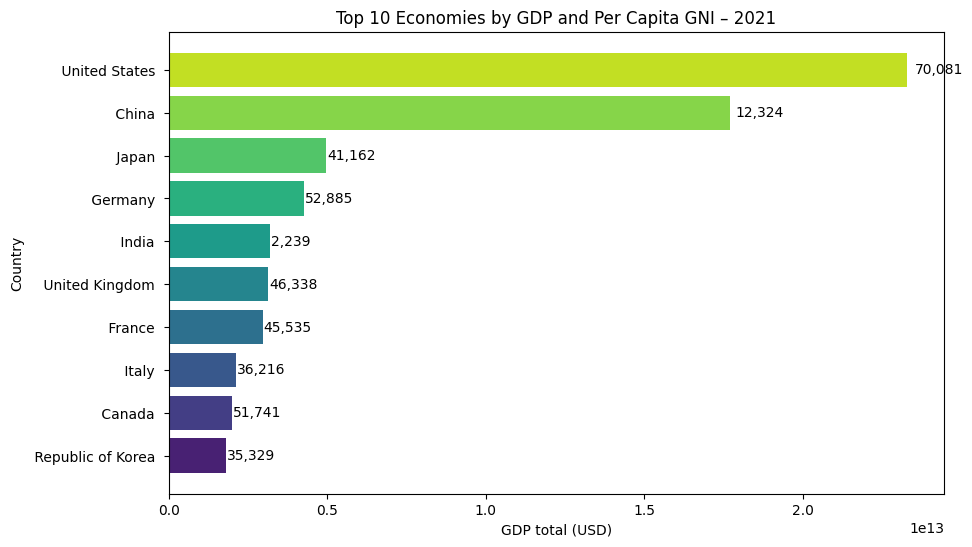

In [164]:
# Calculăm eficiența: cât de bun e GDP-ul transformat în bunăstare
top_countries['Efficiency'] = top_countries['Per capita GNI'] / top_countries['Total_Value_Added_per_capita']

# Sortăm după GDP
top_countries_sorted = top_countries.sort_values('Gross Domestic Product (GDP)', ascending=True)

plt.figure(figsize=(10,6))
bars = plt.barh(
    top_countries_sorted['Country'],
    top_countries_sorted['Gross Domestic Product (GDP)'],
    color=sns.color_palette("viridis", n_colors=10)
)

# Adăugăm etichete GNI per capita pe bare
for bar, gni in zip(bars, top_countries_sorted['Per capita GNI']):
    plt.text(bar.get_width()*1.01, bar.get_y() + bar.get_height()/2, f'{int(gni):,}', va='center')

plt.xlabel('GDP total (USD)')
plt.ylabel('Country')
plt.title(f'Top 10 Economies by GDP and Per Capita GNI – {last_year}')
plt.show()


/tmp/ipython-input-3499080521.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




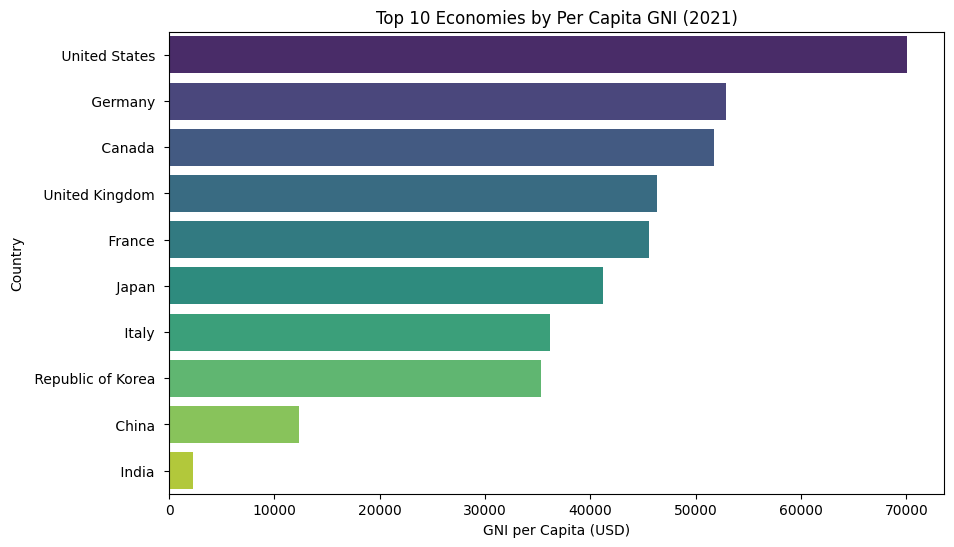

In [178]:
top_countries_sorted = top_countries.sort_values('Per capita GNI', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(
    x='Per capita GNI',
    y='Country',
    data=top_countries_sorted,
    palette='viridis'
)
plt.xlabel('GNI per Capita (USD)')
plt.title(f'Top 10 Economies by Per Capita GNI ({last_year})')
plt.show()


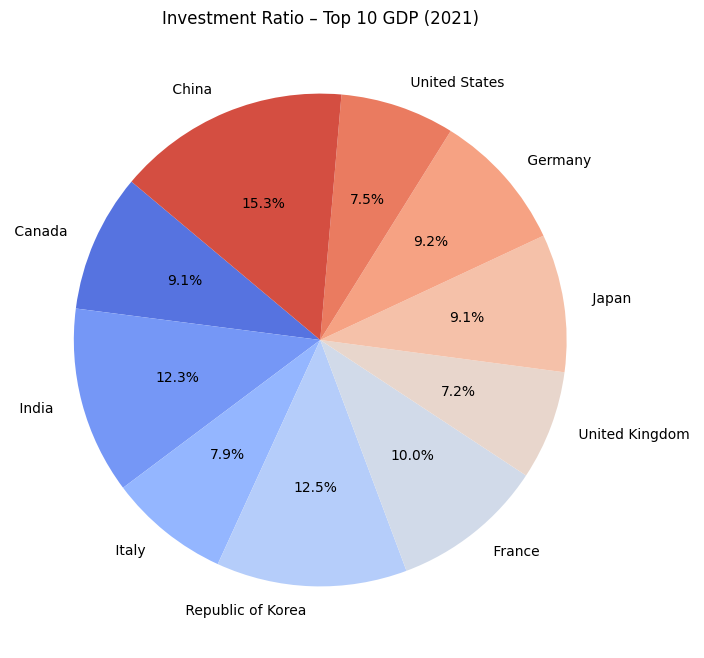

In [196]:
plt.figure(figsize=(8,8))
plt.pie(
    top_countries_sorted['Investment_ratio'],
    labels=top_countries_sorted['Country'],
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette("coolwarm", n_colors=10)
)
plt.title(f'Investment Ratio – Top 10 GDP ({last_year})')
plt.show()


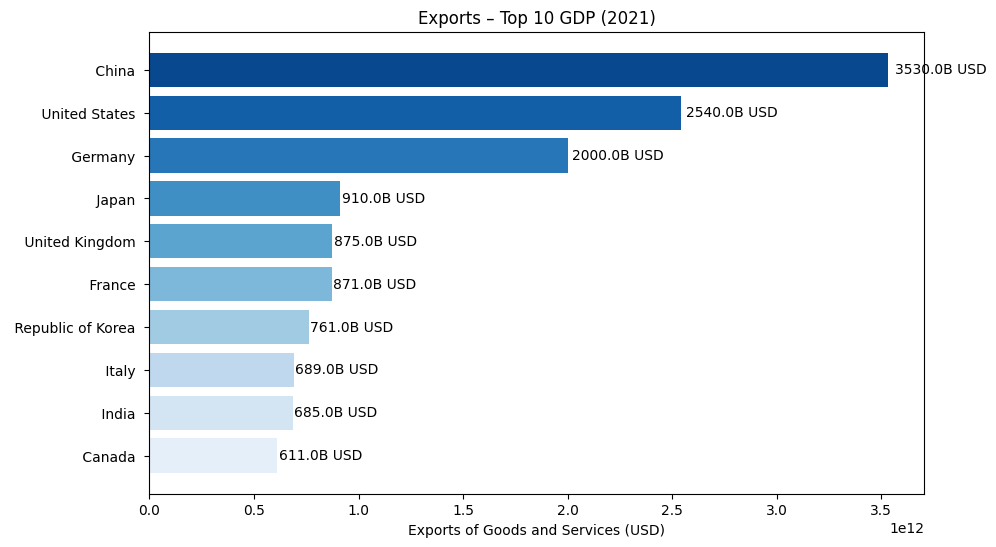

In [182]:
top_countries_sorted = top_countries.sort_values('Exports of goods and services', ascending=True)

plt.figure(figsize=(10,6))
bars = plt.barh(
    top_countries_sorted['Country'],
    top_countries_sorted['Exports of goods and services'],
    color=sns.color_palette("Blues", n_colors=10)
)

# Etichete cu valoarea exporturilor
for bar, export in zip(bars, top_countries_sorted['Exports of goods and services']):
    plt.text(bar.get_width()*1.01, bar.get_y() + bar.get_height()/2, f'{export/1e9:.1f}B USD', va='center')

plt.xlabel('Exports of Goods and Services (USD)')
plt.title(f'Exports – Top 10 GDP ({last_year})')
plt.show()


/tmp/ipython-input-4089775285.py:33: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



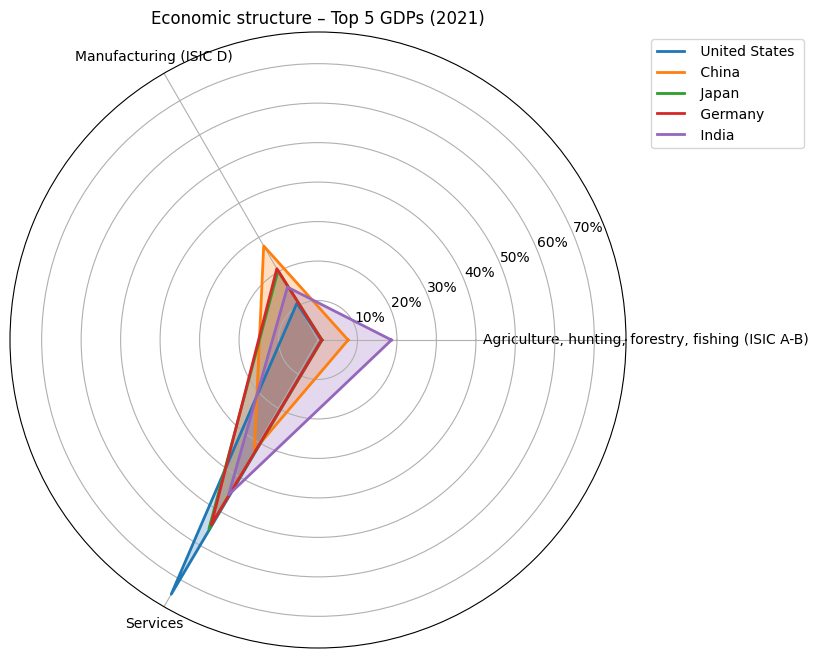

In [180]:
from math import pi

# Top 5 GDP pentru radar chart
radar_top = top_countries.head(5).copy()

# Calculăm Servicii = Total Value Added - Agriculture - Manufacturing - Mining/Utilities
radar_top['Services'] = radar_top['Total Value Added'] - radar_top['Agriculture, hunting, forestry, fishing (ISIC A-B)'] - radar_top['Manufacturing (ISIC D)'] - radar_top['Mining, Manufacturing, Utilities (ISIC C-E)']

# Categorii pentru radar
categories = ['Agriculture, hunting, forestry, fishing (ISIC A-B)', 'Manufacturing (ISIC D)', 'Services']

# Normalizare în procente
for cat in categories:
    radar_top[cat+'_pct'] = radar_top[cat] / radar_top['Total Value Added'] * 100

# Setup radar
N = len(categories)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]  # Închidem cercul

plt.figure(figsize=(8,8))
ax = plt.subplot(111, polar=True)

for i, row in radar_top.iterrows():
    values = [row[cat+'_pct'] for cat in categories]
    values += values[:1]  # Închidem cercul
    ax.plot(angles, values, linewidth=2, label=row['Country'])
    ax.fill(angles, values, alpha=0.25)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
plt.title(f'Economic structure – Top 5 GDPs ({last_year})')
ax.set_yticklabels([f'{int(y)}%' for y in ax.get_yticks()])
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.show()
